In [40]:
import json
import urllib
import urllib.parse
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from math import nan
from scipy.stats import shapiro
from seaborn_qqplot import pplot
import wquantiles

In [2]:
scopus_conferences = ["CEP", "UKICER", "Koli", "ITiCSE", "ICER"]

data_dir = "data"

In [3]:
def affil_institution(affil):
#    print ("affil_detail for ", affil)
    return affil['affilname']

def affil_is_uk(affil):
    if affil['affiliation-country'] == 'United Kingdom':
        return True

In [4]:
paper_dfs = []

paper_affiliation_dfs = []

for conference in scopus_conferences:
    with open(conference + "_papers.json") as conff:
        conf_paper_files=json.load(conff)
        for paper_fname in list(conf_paper_files):
            fname = urllib.parse.quote(paper_fname, safe='')
#            print ("opening ", fname)
            with open(os.path.join(data_dir, fname + ".json")) as paperf:
                paper = json.load(paperf)
                paper_dict = {}
                try:
                    paper_dict['conference'] = conference
                    date = paper['coredata']['prism:coverDate']
                    year = date[0:4]
                    paper_dict['year'] = [year]
                    paper_dict['title'] = [paper['coredata']['dc:title'].strip()]
                    paper_dict['doi'] = [paper['coredata']['prism:doi']]
                    paper_dict['scopus_url'] = [paper['coredata']['prism:url']]

                    title_hash = str(hash(str(paper_dict['title'][0])))
                    paper_dict['title_hash'] = [title_hash]
                    paper_dict['key'] = "_".join([conference,year , title_hash[-6:]])
                    paper_affils = paper['affiliation']
                    try:
                        end_page = paper['coredata']['prism:endingPage']
                        start_page = paper['coredata']['prism:startingPage']
                        num_pages = int(end_page) - int(start_page) + 1
                    except Exception:
                        num_pages = nan
                    paper_dict['num_pages'] = num_pages
                    
                    if not (isinstance(paper_affils, list)):
                        paper_affils = [paper_affils]
                    
                    paper_uk_affils = filter(affil_is_uk, paper_affils)
                    
                    paper_uk_institutions = list(map(affil_institution, paper_uk_affils))

                    paper_affiliation_df = pd.DataFrame({"institution": paper_uk_institutions})
                    paper_affiliation_df['paper'] = paper_dict['key']
                    paper_affiliation_df['weight'] = 1 / len(paper_affils)
                    paper_affiliation_df['conference'] = conference
                    paper_affiliation_df['doi'] = paper_dict['doi'][0]

                    try:
                        paper_dict['abstract'] = [paper['coredata']['dc:description']]
                    except Exception:
                        paper_dict['abstract'] = ''

                except KeyError as e:
                    print("KeyError ", e, " in ",fname)
            
                paper_df = pd.DataFrame(paper_dict)
                paper_dfs.append(paper_df)
                paper_affiliation_dfs.append(paper_affiliation_df)


KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85211343653
KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85174486779
KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85138385680
KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85115268121
KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85198629881
KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85216107850
KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85216101881


In [7]:
with open("2018_CEP_papers.json") as CEP_2018f:
    CEP_2018_papers=json.load(CEP_2018f)

def CEP_2018_paper_institutions(authors):
    institution = None
    for author in authors:
        skip
        
        
for paper in CEP_2018_papers:
    conference = "CEP"
    year = "2018"
    paper_dict = {}
    
    paper_dict['conference'] = conference
    paper_dict['year'] = [year]
    paper_dict['title'] = [paper['title'].strip()]
    print ("adding ", paper_dict['title'])
    paper_dict['abstract'] = [paper['abstract']]
    
    title_hash = str(hash(str(paper_dict['title'][0])))
    paper_dict['title_hash'] = [title_hash]
    paper_dict['key'] = "_".join([conference,year , title_hash[-6:]])

    paper_affils = paper['authors']
    if not (isinstance(paper_affils, list)):
        paper_affils = [paper_affils]
    
    
    
    paper_df = pd.DataFrame(paper_dict)
    paper_dfs.append(paper_df)

    
CEP_2018_papers[3]['authors']

adding  ['Intelligent Agents for Education']
adding  ['Sustainable Computing: a home for LSEP, Commercial practice and Research skills']
adding  ['Including IT service management in the Computing curriculum: a caricature approach.']
adding  ['"It\'s only a computing project - so there can\'t be any ethical issues..."']
adding  ['No money worries: new student identities for Graduate Level Apprentices']
adding  ['The enemies within - inhibitors to learning']
adding  ['Blocks-based programming for introductory programming in Python']
adding  ['Enhancing computer programming skills through Virtual Reality']
adding  ['Supporting the learning of programming with the PRIMM approach']
adding  ['Self regulated Learning in Engineering and Computing Classrooms']
adding  ['Learner engagement in larger computer science classes']
adding  ["Promoting learning by going against students' preference to learning"]
adding  ['The Associate Student Project celebrates five years of student transitions from f

[{'firstName': 'David',
  'lastName': 'Bowers',
  'email': '',
  'department': '',
  'institution': 'The Open University'}]

In [8]:
papers_df = pd.concat(paper_dfs)
papers_df.set_index('key', inplace=True)


In [9]:
papers_df[papers_df['num_pages'].isnull()].groupby('conference').count()

,year,title,doi,scopus_url,title_hash,num_pages,abstract
conference,,,,,,,
CEP,56,56,36,36,56,0,56
ICER,4,4,2,2,2,0,2
ITiCSE,29,29,28,28,28,0,28
Koli,27,27,27,27,27,0,27
UKICER,80,80,76,76,76,0,76


In [10]:
papers_df['abstract'].sort_values()

key
CEP_2025_330741          
ITiCSE_2022_777766       
ITiCSE_2022_020048       
ITiCSE_2022_978478       
ITiCSE_2022_411346       
                     ... 
NaN                   NaN
NaN                   NaN
NaN                   NaN
NaN                   NaN
NaN                   NaN
Name: abstract, Length: 400, dtype: object

In [11]:
papers_df.groupby('conference').count()

,year,title,doi,scopus_url,title_hash,num_pages,abstract
conference,,,,,,,
CEP,103,103,83,83,103,47,103
ICER,28,28,26,26,26,24,26
ITiCSE,155,155,154,154,154,126,154
Koli,27,27,27,27,27,0,27
UKICER,87,87,83,83,83,7,83


In [12]:
affiliations_df = pd.concat(paper_affiliation_dfs)
affiliations_df

,institution,paper,weight,conference,doi
0,University of Glasgow,CEP_2025_330741,1.0,CEP,10.1145/3702212.3702220
0,The Open University,CEP_2025_758769,0.5,CEP,10.1145/3702212.3702223
1,Swansea University,CEP_2025_758769,0.5,CEP,10.1145/3702212.3702223
0,University of Strathclyde,CEP_2025_167296,0.5,CEP,10.1145/3702212.3702217
1,University of Glasgow,CEP_2025_167296,0.5,CEP,10.1145/3702212.3702217
...,...,...,...,...,...
0,University of Glasgow,ICER_2019_531399,1.0,ICER,10.1145/3291279.3339437
0,University of Glasgow,ICER_2019_440638,1.0,ICER,10.1145/3291279.3339442
0,"University of Nottingham, Faculty of Social Sc...",ICER_2019_535199,1.0,ICER,10.1145/3291279.3339425
0,University of Glasgow,ICER_2019_939463,1.0,ICER,10.1145/3291279.3341205


In [13]:
institutions_df = pd.read_excel("institutions.xlsx", dtype=str)
#institutions_df

In [14]:
affiliations_domain = pd.merge(affiliations_df, institutions_df, how="left", left_on='institution', right_on='name')

def fix_affiliation (row):
    if not (isinstance(row['domain'], float)):
        return row['domain']
    for index, inst_row in institutions_df.iterrows():
        if inst_row['name'] in row['institution']:
            return inst_row['domain']
    if row['doi'] == "10.1145/3631802.3631803":
        return "cam"
    if row['doi'] == "10.1145/3649217.3653622":
        return "warwick"
    if row['doi'] == "10.1145/3587103.3594143":
        return "citystgeorges"
    if row['doi'] == "10.1145/3304221.3325580":
        return "warwick"
    if row['doi'] == "10.1145/3501385.3543960":
        return "cam"
    
affiliations_domain['domain'] = affiliations_domain.apply(fix_affiliation, axis=1)

affiliations_domain[affiliations_domain.domain.isnull()]

,institution,paper,weight,conference,doi,domain,name
156,IBM United Kingdom Limited,UKICER_2023_786721,0.166667,UKICER,10.1145/3610969.3611121,None,NaN
160,ForgeRock,UKICER_2023_786721,0.166667,UKICER,10.1145/3610969.3611121,None,NaN
225,Barefoot Computing,UKICER_2019_441486,0.333333,UKICER,10.1145/3351287.3351291,None,NaN
380,Independent,ITiCSE_2022_529693,0.250000,ITiCSE,10.1145/3502717.3532119,None,NaN
497,James Fisher Digital,ITiCSE_2019_367878,0.500000,ITiCSE,10.1145/3304221.3325559,None,NaN


/Users/dcs0spb/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


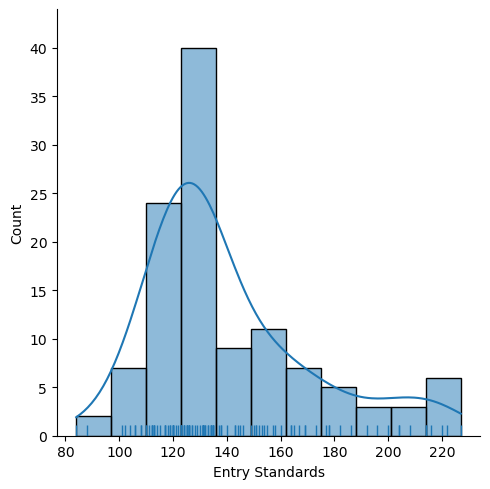

In [75]:
cug_df = pd.read_csv("Complete_University_Guide_Computer_Science_2025.csv", skiprows=4)

cug_domain = pd.merge(cug_df, institutions_df, how="left", left_on='Institution', right_on='name')
len(cug_domain[cug_domain.domain.notnull()])

def fix_institution(row, colname):
    if not (isinstance(row['domain'], float)):
        return row['domain']
    for index, inst_row in institutions_df.iterrows():
        if inst_row['name'] in row[colname]:
            return inst_row['domain']
    
def fix_cug_institution (row):
    return fix_institution(row, 'Institution')

    
cug_domain['domain'] = cug_domain.apply(fix_cug_institution, axis=1)

cug_domain[cug_domain.domain.isnull()]

sns.displot(data=cug_df, x="Entry Standards", kde=True, rug=True)



In [28]:
# Is Entry Standards data normally distributed? (Shapiro-Wilk)

stat, p = shapiro(cug_df['Entry Standards'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.892, p=0.000
Sample does not look Gaussian (reject H0)


<Axes: xlabel='Entry Standards', ylabel='Research Quality'>

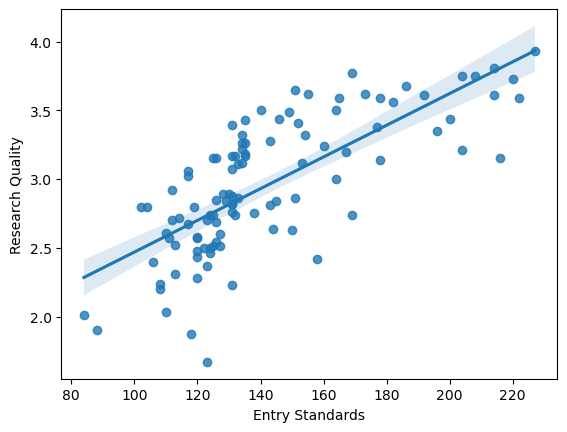

In [25]:
sns.regplot(data=cug_df, x="Entry Standards", y="Research Quality")

<Axes: xlabel='Entry Standards', ylabel='Student Satisfaction'>

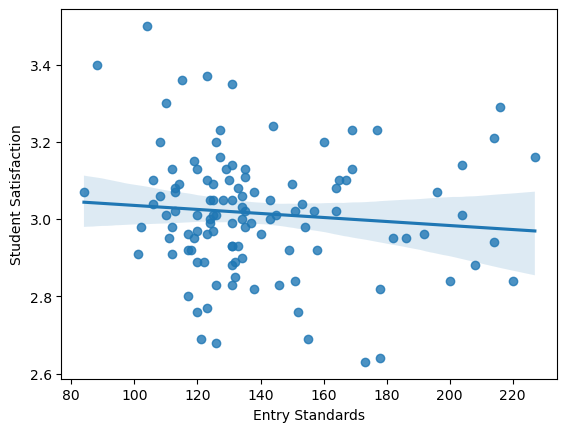

In [26]:
sns.regplot(data=cug_df, x="Entry Standards", y="Student Satisfaction")

In [69]:
student_numbers = pd.read_csv("HESA-table-37.csv", skiprows=20)

# print(student_numbers['Category'].unique())
# print(student_numbers['Academic Year'].unique())

student_numbers = student_numbers[(student_numbers['Category'] == '121 IT, systems sciences & computer software engineering') &
                                  (student_numbers['Academic Year'] == '2023/24') &
                                  (student_numbers['UKPRN'].notnull()) &
                                  (student_numbers['Country of HE provider'] == 'All') &
                                  (student_numbers['Number']>0)
                                 ]
student_numbers['HE provider'] = student_numbers['HE provider'].str.replace("The University","University")

In [79]:
student_numbers_domain = pd.merge(student_numbers, institutions_df, how="left", left_on='HE provider', right_on='name')


def fix_numbers_institution (row):
    return fix_institution(row, 'HE provider')

    
student_numbers_domain['domain'] = student_numbers_domain.apply(fix_numbers_institution, axis=1)

print(len(student_numbers_domain[student_numbers_domain.domain.notnull()]))

student_numbers_domain[student_numbers_domain.domain.isnull()].sort_values('Number')

#student_numbers.sort_values('Number')

63


,UKPRN,HE provider,Country of HE provider,Region of HE provider,Academic Year,Category marker,Category,Number,domain,name
72,10089591.0,LIBF Limited,All,London,2023/24,Cost centre,"121 IT, systems sciences & computer software e...",5,None,NaN
77,10007820.0,Grŵp Llandrillo Menai,All,Wales,2023/24,Cost centre,"121 IT, systems sciences & computer software e...",5,None,NaN
34,10008912.0,Coleg Gwent,All,Wales,2023/24,Cost centre,"121 IT, systems sciences & computer software e...",5,None,NaN
28,10034450.0,Cardiff and Vale College,All,Wales,2023/24,Cost centre,"121 IT, systems sciences & computer software e...",10,None,NaN
21,10000936.0,University College of Osteopathy,All,London,2023/24,Cost centre,"121 IT, systems sciences & computer software e...",10,None,NaN
...,...,...,...,...,...,...,...,...,...,...
116,10006299.0,Staffordshire University,All,West Midlands,2023/24,Cost centre,"121 IT, systems sciences & computer software e...",2205,None,NaN
54,10007146.0,University of Greenwich,All,London,2023/24,Cost centre,"121 IT, systems sciences & computer software e...",2240,None,NaN
132,10007164.0,"University of the West of England, Bristol",All,South West,2023/24,Cost centre,"121 IT, systems sciences & computer software e...",2250,None,NaN
37,10001883.0,De Montfort University,All,East Midlands,2023/24,Cost centre,"121 IT, systems sciences & computer software e...",2285,None,NaN


In [16]:
affiliations_cug = affiliations_domain.merge(cug_domain[pd.notnull(cug_domain.domain)], how="left", on="domain")
affiliations_cug
affiliations_cug[affiliations_cug['Entry Standards'].isnull()]['institution'].unique()

array(['The Open University', 'Arunside Primary School',
       'Altitude Foundation', 'Raspberry Pi Foundation',
       'London School of Economics and Political Science',
       "St Mark's West Essex Catholic School",
       'IBM United Kingdom Limited', 'ForgeRock', 'Theatr Na NOg',
       'Barefoot Computing', 'The Alan Turing Institute',
       'Birmingham Newman University', 'The Scottish Tech Army',
       'Independent', 'James Fisher Digital'], dtype=object)

/Users/dcs0spb/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


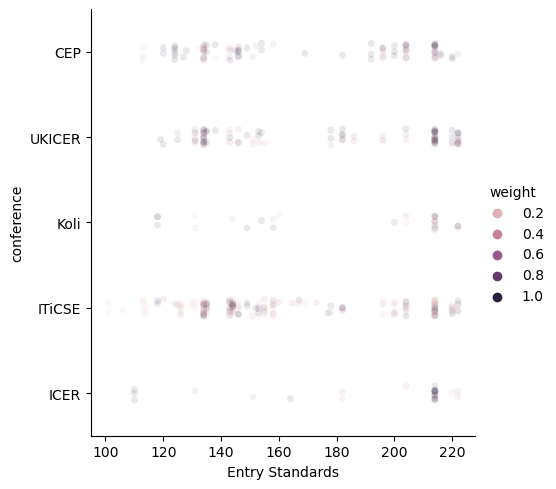

In [21]:
sns.catplot(data=affiliations_cug,x="Entry Standards", y="conference", hue="weight", alpha=0.1)

In [392]:
affiliations_cug[(affiliations_cug.conference == "Koli") & (affiliations_cug["Entry Standards"].notnull())].sort_values("Entry Standards")

,institution,paper,weight,conference,doi,domain,name_x,Rank,Institution,Entry Standards,Student Satisfaction,Research Quality,Continuation,Graduate prospects outcomes,Graduate prospects on track,Overall Score,name_y
243,University of Gloucestershire,Koli_2021_266939,1.000000,Koli,10.1145/3488042.3488043,glos,University of Gloucestershire,98.0,University of Gloucestershire,118.0,2.92,1.87,87.7,76.0,75.0,73.9,University of Gloucestershire
235,University of Gloucestershire,Koli_2022_967295,1.000000,Koli,10.1145/3564721.3565952,glos,University of Gloucestershire,98.0,University of Gloucestershire,118.0,2.92,1.87,87.7,76.0,75.0,73.9,University of Gloucestershire
241,University of Gloucestershire,Koli_2021_637781,1.000000,Koli,10.1145/3488042.3488046,glos,University of Gloucestershire,98.0,University of Gloucestershire,118.0,2.92,1.87,87.7,76.0,75.0,73.9,University of Gloucestershire
229,Aberystwyth University,Koli_2023_538868,0.200000,Koli,10.1145/3631802.3631846,aber,Aberystwyth University,30.0,Aberystwyth University,131.0,3.35,3.17,95.1,92.0,80.0,86.2,Aberystwyth University
246,University of Kent,Koli_2021_220991,0.333333,Koli,10.1145/3488042.3490020,kent,University of Kent,40.0,University of Kent,131.0,2.93,3.39,94.3,85.0,77.0,83.4,University of Kent
230,Robert Gordon University,Koli_2023_180646,0.333333,Koli,10.1145/3631802.3631817,rgu,Robert Gordon University,73.0,Robert Gordon University,144.0,3.24,2.64,91.3,79.0,74.0,77.6,Robert Gordon University
236,"Department of Educational Research, Lancaster ...",Koli_2022_071083,1.000000,Koli,10.1145/3564721.3565946,lancaster,NaN,23.0,Lancaster University,149.0,2.92,3.49,97.6,93.0,84.0,87.9,Lancaster University
252,Queen's University Belfast,Koli_2019_030619,1.000000,Koli,10.1145/3364510.3366169,qub,Queen's University Belfast,22.0,Queen's University Belfast,154.0,2.98,3.32,96.2,94.0,87.0,88.0,Queen's University Belfast
240,Glasgow Caledonian University,Koli_2021_833943,0.333333,Koli,10.1145/3488042.3488068,gcu,Glasgow Caledonian University,86.0,Glasgow Caledonian University,158.0,2.92,2.42,90.6,79.0,76.0,76.2,Glasgow Caledonian University
234,Glasgow Caledonian University,Koli_2023_950480,1.000000,Koli,10.1145/3631802.3631811,gcu,Glasgow Caledonian University,86.0,Glasgow Caledonian University,158.0,2.92,2.42,90.6,79.0,76.0,76.2,Glasgow Caledonian University


In [48]:
# weighted mean
for characteristic in ['Entry Standards', '']:
    print ("CUG", characteristic, "mean", cug_df[characteristic].mean())
    print ("CUG", characteristic, "median", cug_df[characteristic].median())

    for conference in scopus_conferences:
        conf_affils_cug = affiliations_cug[affiliations_cug.conference == conference]

        affil_weighted_mean =  (conf_affils_cug[characteristic] * conf_affils_cug['weight']).sum() / conf_affils_cug['weight'].sum()
        print(conference, characteristic, "weighted mean", affil_weighted_mean)
        affil_weighted_median = wquantiles.median(conf_affils_cug[characteristic], conf_affils_cug['weight'])
        print(conference, characteristic, "weighted median", affil_weighted_median)


CUG Entry Standards mean 140.23931623931625
CUG Entry Standards median 131.0
CEP Entry Standards weighted mean 154.76441102756894
CEP Entry Standards weighted median 192.0
UKICER Entry Standards weighted mean 157.73914782956592
UKICER Entry Standards weighted median 196.0
Koli Entry Standards weighted mean 169.35556811758056
Koli Entry Standards weighted median 214.0
ITiCSE Entry Standards weighted mean 153.06671802589076
ITiCSE Entry Standards weighted median 155.0
ICER Entry Standards weighted mean 180.23733719247468
ICER Entry Standards weighted median 214.0


In [348]:
affiliations_grouped = affiliations_cug.groupby(["conference", "domain"])["weight"].sum().reset_index()

In [349]:
affiliations_grouped[affiliations_grouped['conference']=="ITiCSE"].sort_values("weight")

,conference,domain,weight
77,ITiCSE,nottingham,0.100000
93,ITiCSE,yorksj,0.125000
46,ITiCSE,aber,0.166667
89,ITiCSE,sussex,0.166667
67,ITiCSE,kent,0.166667
47,ITiCSE,abertay,0.200000
86,ITiCSE,southwales,0.200000
80,ITiCSE,port,0.222222
50,ITiCSE,brookes,0.319780
84,ITiCSE,sheffield,0.333333


In [350]:
papers_df = pd.concat(paper_dfs, ignore_index=True)

In [351]:
papers_df

,conference,year,title,doi,scopus_url,title_hash,key,abstract,date
0,CEP,2025,Enhancing conceptual understanding in early ye...,10.1145/3702212.3702220,https://api.elsevier.com/content/abstract/scop...,-7612675003404671693,CEP_2025_671693,NaN,NaN
1,CEP,2025,Assessing Software Engineering Students' Analy...,10.1145/3702212.3702223,https://api.elsevier.com/content/abstract/scop...,6668210468012425228,CEP_2025_425228,NaN,NaN
2,CEP,2025,Themes in the Declared Use of Generative Artif...,10.1145/3702212.3702217,https://api.elsevier.com/content/abstract/scop...,-6489872609726456639,CEP_2025_456639,NaN,NaN
3,CEP,2025,Learning Programming Languages by Pantomime,10.1145/3702212.3702213,https://api.elsevier.com/content/abstract/scop...,5183681864324892833,CEP_2025_892833,NaN,NaN
4,CEP,2025,FLARE: A Framework Supporting Code Comprehensi...,10.1145/3702212.3702219,https://api.elsevier.com/content/abstract/scop...,-6801671759654871360,CEP_2025_871360,NaN,NaN
...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,Reaching out - reaching in,NaN,NaN,NaN,NaN,The Computer Science degree at Middlesex has a...,2018-01-11
396,NaN,NaN,Widening Participation - 'Stretching the Middle',NaN,NaN,NaN,NaN,Conducting meaningful outreach activity in ord...,2018-01-11
397,NaN,NaN,Puzzling things out: exploring the predictive ...,NaN,NaN,NaN,NaN,The Year in Computing is a new programme at th...,2018-01-11
398,NaN,NaN,Managing Plagiarism in Programming Assignments...,NaN,NaN,NaN,NaN,Plagiarism is a common concern for coursework ...,2018-01-11


In [393]:
papers_df.to_csv("papers.csv")